In [1]:
%%capture
import jax
import jax.numpy as np
import pyccl as ccl
import matplotlib.pylab as plt
from sacc import Sacc
from typing import List

# jax cosmo
import jax_cosmo as jc
from jax_cosmo.core import Cosmology
from jax_cosmo.probes import CIBTracer, zPowerTracer, tSZTracer, ISWTracer, CMBLensingTracer, WeakLensing

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 12

## Cosmological Parameters


In [2]:
cosmo_jax = Cosmology(Omega_c=0.25,
                      Omega_b=0.05,
                      h=0.7,
                      sigma8 = 0.8,
                      n_s=0.96,
                      Omega_k=0.,
                      w0=-1.,
                      wa=0.,
                     Neff = 3.044)

cosmo_ccl = ccl.Cosmology(Omega_c=0.25,
                          Omega_b=0.05,
                          h=0.7,
                          sigma8 = 0.8,
                          n_s=0.96,
                          w0=-1.0,
                          wa=0.,
                          Neff = 3.044,
                          transfer_function='eisenstein_hu',
                          matter_power_spectrum='halofit')

In [3]:
z_min = 0.0
z_max = 6.0
n_chi = 1024

## CIB Tracer


In [4]:
ccl_tracer = ccl.CIBTracer(cosmo_ccl,
                           z_min = z_min,
                           z_max = z_max,
                           n_chi= n_chi)

w_cib_ccl, chi_ccl = ccl_tracer.get_kernel()

cib_tracer = CIBTracer(z_min = z_min, z_max = z_max, n_z = n_chi)
w_cib_jax, chi_jax = cib_tracer.kernel(cosmo_jax)

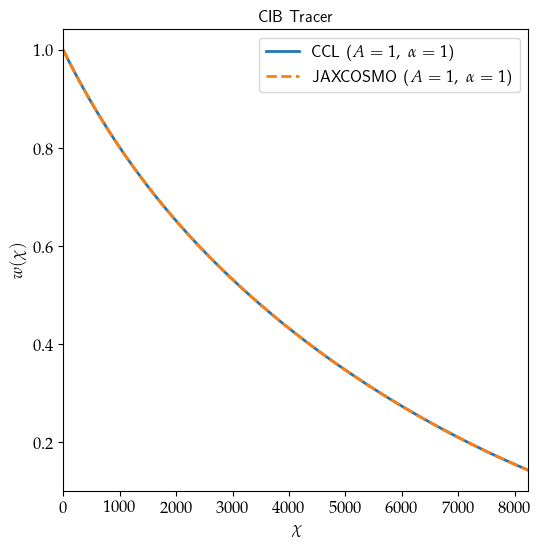

In [5]:
plt.figure(figsize = (6, 6))
plt.title('CIB Tracer', fontsize = fontSize)
plt.plot(chi_ccl[0], w_cib_ccl[0], lw = 2, label = 'CCL' + r' ($A=1,\;\alpha=1$)')
plt.plot(chi_jax / cosmo_jax.h, w_cib_jax, lw = 2, linestyle = '--', label = 'JAXCOSMO' + r' ($A=1,\;\alpha=1$)')
plt.ylabel(r'$w(\chi)$', fontsize = fontSize)
plt.xlabel(r'$\chi$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(min(chi_ccl[0]), max(chi_ccl[0]))
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':12})
plt.show()

## Power from Redshift


In [6]:
ccl_zpower_tracer = ccl.tracers.Tracer.from_z_power(cosmo_ccl,
                           A = 1,
                           alpha = 2,
                           z_min = z_min,
                           z_max = z_max,
                           n_chi= n_chi)

w_ccl_zpower, chi_ccl_zpower = ccl_zpower_tracer.get_kernel()

jax_zpower_tracer = zPowerTracer(z_min = z_min, z_max = z_max, n_z = n_chi)
w_jax_zpower, chi_jax_zpower = jax_zpower_tracer.kernel(cosmo_jax, amplitude=1, alpha=2)

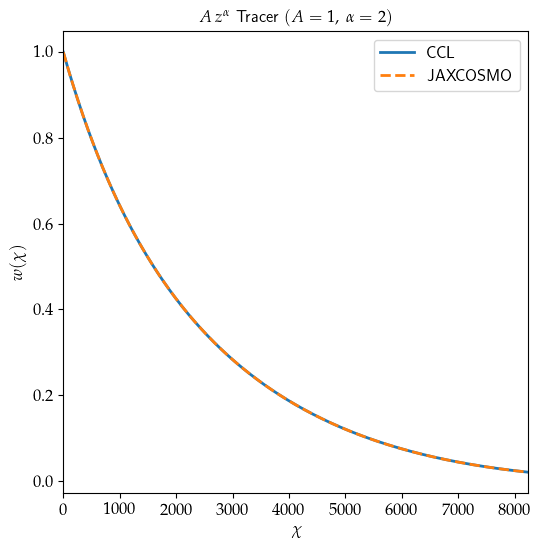

In [7]:
plt.figure(figsize = (6, 6))
plt.title(r'$A\,z^{\alpha}$ Tracer $(A=1,\,\alpha=2)$', fontsize = fontSize)
plt.plot(chi_ccl_zpower[0], w_ccl_zpower[0], lw = 2, label = 'CCL')
plt.plot(chi_jax_zpower / cosmo_jax.h, w_jax_zpower, lw = 2, linestyle = '--', label = 'JAXCOSMO')
plt.ylabel(r'$w(\chi)$', fontsize = fontSize)
plt.xlabel(r'$\chi$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(min(chi_ccl_zpower[0]), max(chi_ccl_zpower[0]))
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':12})
plt.show()

## tSZ Tracer


In [8]:
ccl_tSZ = ccl.tSZTracer(cosmo_ccl, z_max=z_max, n_chi=n_chi)
w_ccl_tSZ, chi_ccl_tSZ = ccl_tSZ.get_kernel()

jax_tracer_tSZ = tSZTracer(z_max = z_max, n_z = n_chi)
w_jax_tSZ, chi_jax_tSZ = jax_tracer_tSZ.kernel(cosmo_jax)

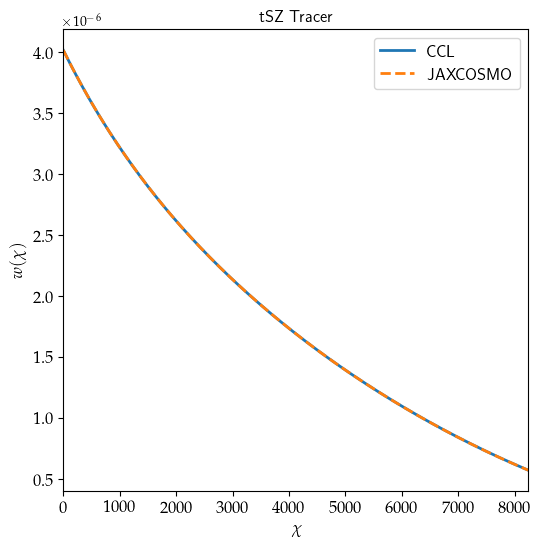

In [9]:
plt.figure(figsize = (6, 6))
plt.title('tSZ Tracer', fontsize = fontSize)
plt.plot(chi_ccl_tSZ[0], w_ccl_tSZ[0], lw = 2, label = 'CCL')
plt.plot(chi_jax_tSZ / cosmo_jax.h, w_jax_tSZ, lw = 2, linestyle = '--', label = 'JAXCOSMO')
plt.ylabel(r'$w(\chi)$', fontsize = fontSize)
plt.xlabel(r'$\chi$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(min(chi_ccl[0]), max(chi_ccl[0]))
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':12})
plt.show()

## ISW Tracer


In [10]:
ccl_ISW_Tracer = ccl.ISWTracer(cosmo_ccl, z_max=z_max, n_chi=n_chi)
w_ccl_ISW, chi_ccl_ISW = ccl_ISW_Tracer.get_kernel()

jax_tracer_ISW = ISWTracer(z_max = z_max, n_z = n_chi)
w_jax_ISW, chi_jax_ISW = jax_tracer_ISW.kernel(cosmo_jax)

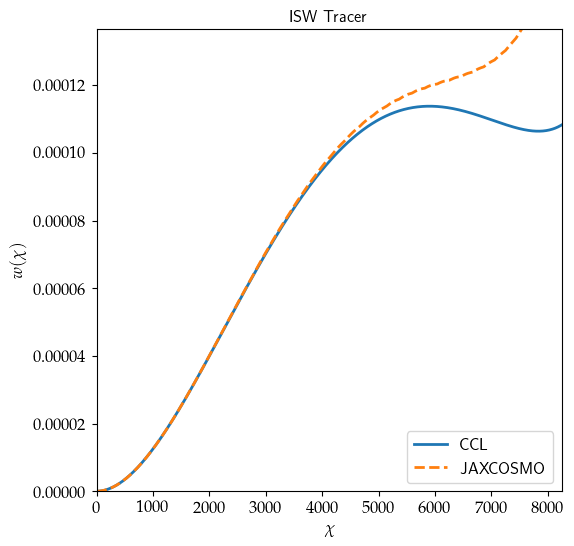

In [11]:
plt.figure(figsize = (6, 6))
plt.title('ISW Tracer', fontsize = fontSize)
plt.plot(chi_ccl_ISW[0], w_ccl_ISW[0], lw = 2, label = 'CCL')
plt.plot(chi_jax_ISW / cosmo_jax.h, w_jax_ISW / cosmo_jax.h**2 , lw = 2, linestyle = '--', label = 'JAXCOSMO')
plt.ylabel(r'$w(\chi)$', fontsize = fontSize)
plt.xlabel(r'$\chi$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(min(chi_ccl_ISW[0]), max(chi_ccl_ISW[0]))
plt.ylim(0.0,  1.2*max([max(w_ccl_ISW[0]), max(w_jax_ISW)]))
plt.legend(loc = 'lower right',prop={'family':'sans-serif', 'size':12})
plt.show()

## CMB Lensing Tracer


In [12]:
z_source = 1100
n_samples = 1000

ccl_CMB_Tracer = ccl.CMBLensingTracer(cosmo_ccl, z_source=z_source, n_samples=n_samples)
w_ccl_CMB, chi_ccl_CMB = ccl_CMB_Tracer.get_kernel()

jax_tracer_CMB = CMBLensingTracer(z_source = z_source, n_samples=n_samples)
w_jax_CMB, chi_jax_CMB = jax_tracer_CMB.kernel(cosmo_jax)

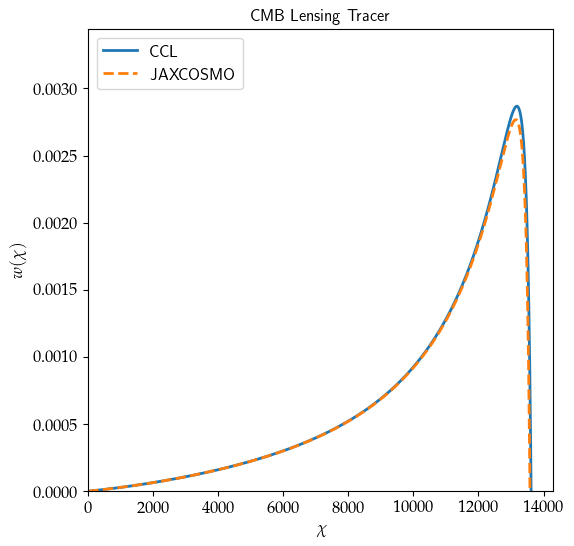

In [13]:
plt.figure(figsize = (6, 6))
plt.title('CMB Lensing Tracer', fontsize = fontSize)
plt.plot(chi_ccl_CMB[0], w_ccl_CMB[0], lw = 2, label = 'CCL')
plt.plot(chi_jax_CMB / cosmo_jax.h, w_jax_CMB / cosmo_jax.h, lw = 2, linestyle = '--', label = 'JAXCOSMO')
plt.ylabel(r'$w(\chi)$', fontsize = fontSize)
plt.xlabel(r'$\chi$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'upper left',prop={'family':'sans-serif', 'size':12})
plt.ylim(0, 1.2*max(w_ccl_CMB[0]))
plt.xlim(0, 1.05*max(chi_ccl_CMB[0]))
plt.show()

## Weak Lensing Kernel


In [14]:
def get_nz(saccfile: Sacc, tracertype: str = "wl", zmax: float = 3.0) -> List[jc.redshift.redshift_distribution]:
    """
    Extract the redshift distributions from a SACC file for a specific tracer type.

    This function processes the redshift distributions for tracers stored in the input SACC file.
    It supports extracting weak lensing (WL) and galaxy clustering (GC) tracers. The extracted
    distributions are represented as JAX Cosmo custom redshift distributions.

    Args:
        saccfile (Sacc): The input SACC file containing tracer and data information.
        tracertype (str, optional): The type of tracer to extract redshift distributions for.
            Options are:
            - "wl": Weak lensing tracers (default).
            - "gc": Galaxy clustering tracers.
        zmax (float, optional): The maximum redshift to which the distributions are extended. Defaults to 3.0.

    Returns:
        A list of JAX Cosmo custom redshift distributions, one for each bin.

    Raises:
        ValueError: If the specified `tracertype` is not supported or tracers of the type are missing in the SACC file.

    Example:
        ```python
        from sacc import Sacc

        sfile = Sacc.load_fits("example.sacc")
        redshift_distributions = get_nz(sfile, tracertype="wl", zmax=2.5)
        ```
    """
    # Extract tracer names from the SACC file
    tracers_names = list(saccfile.tracers.keys())

    # Determine the tracer name prefix based on the type
    if tracertype == "wl":
        tname = "DESwl__"
    elif tracertype == "gc":
        tname = "DESgc__"
    else:
        raise ValueError(f"Unsupported tracertype: {tracertype}. Must be 'wl' or 'gc'.")

    # Count the number of bins for the specified tracer type
    nbin = sum([tname in tracers_names[i] for i in range(len(tracers_names))])

    if nbin == 0:
        raise ValueError(f"No tracers of type {tracertype} found in the SACC file.")

    # Initialize the list for storing redshift distributions
    nz_distributions = []

    # Process each tracer bin
    for i in range(nbin):
        name = tname + str(i)
        distribution = saccfile.tracers[name]
        # Convert redshift and n(z) arrays to JAX-COSMO custom redshift format
        jaxred = jc.redshift.custom_nz(
            distribution.z.astype("float64"),
            distribution.nz.astype("float64"),
            zmax=zmax,
        )
        nz_distributions.append(jaxred)

    return nz_distributions

In [15]:
saccfile = Sacc.load_fits("data/cls_DESY1.fits")
wl_nz = get_nz(saccfile, 'wl', zmax=3.0)
ndist = len(wl_nz)

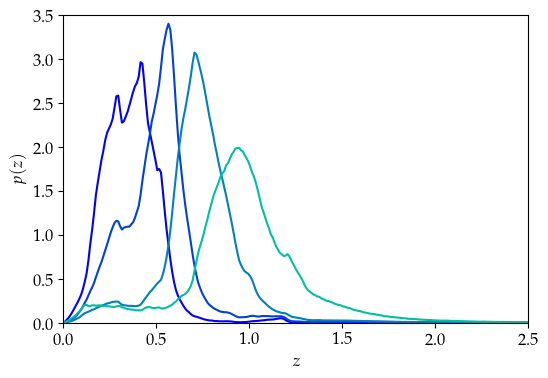

In [16]:
cmap = plt.cm.winter
colors = [cmap(i / ndist) for i in range(ndist)]

plt.figure(figsize=(6,4))
for i in range(ndist):
    plt.plot(wl_nz[i].params[0], wl_nz[i].params[1], color = colors[i])
plt.ylabel(r'$p(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.ylim(0.0, 3.5)
plt.xlim(0.0, 2.5)
plt.show()

### Kernel in JAX-COSMO


In [17]:
deltaz_wl = np.zeros(ndist)
multiplicative = np.zeros(ndist)
redshifts = wl_nz[0].params[0]
nredshifts = 400
nz_wl_sys = [jc.redshift.systematic_shift(nzi, dzi) for nzi, dzi in zip(wl_nz, deltaz_wl)]

probes_wl = [jc.probes.WeakLensing(nz_wl_sys, multiplicative_bias=multiplicative)]
jc_wl_kernels = np.stack([probes_wl[0].kernel(cosmo_jax, redshifts[i], ell=1000) for i in range(nredshifts)])

### Kernel in CCL


In [18]:
def get_weak_lensing_kernels(
    cosmo: ccl.Cosmology,
    redshifts: np.ndarray,
    n_z: np.ndarray
) -> np.ndarray:
    """
    Compute the weak lensing kernels for multiple tomographic bins.

    Args:
        cosmo (ccl.Cosmology): Cosmological model object used to compute the weak lensing kernels.
        redshifts (np.ndarray): 1D array of redshift values corresponding to the redshift distribution.
        n_z (np.ndarray): 2D array where each row represents the redshift distribution (n(z))
                          for a specific tomographic bin.

    Returns:
        np.ndarray: A 2D array where each row corresponds to the weak lensing kernel (w_ccl_wl)
                    for a specific tomographic bin.

    Notes:
        - The function internally uses a WeakLensingTracer to compute the kernel for each tomographic bin.
        - The shape of the output array will be `(nbins, len(redshifts))`, where `nbins` is the number
          of tomographic bins (rows in `n_z`), and `len(redshifts)` is the number of redshift samples.
    """
    nbins = n_z.shape[0]
    nredshifts = len(redshifts)
    kernel = []

    for i in range(nbins):
        # Define the redshift distribution for the current bin
        dndz = (redshifts, n_z[i])

        # Create a WeakLensingTracer for the current bin
        ccl_wl_Tracer = ccl.WeakLensingTracer(
            cosmo,
            dndz=dndz,
            has_shear=True,
            ia_bias=None,
            use_A_ia=False,
            n_samples=nredshifts
        )

        # Extract the kernel and comoving radial distance
        w_ccl_wl, chi_ccl_wl = ccl_wl_Tracer.get_kernel()

        # Append the kernel for the current bin
        kernel.append(w_ccl_wl[0])

    # Stack the kernels into a single 2D array
    kernel = np.stack(kernel)
    return kernel


In [19]:
n_z = np.stack([wl_nz[i].params[1] for i in range(ndist)])
kernel = get_weak_lensing_kernels(cosmo_ccl, redshifts, n_z)
factor = ccl.physical_constants['CLIGHT_HMPC'] / ccl.h_over_h0(cosmo_ccl, 1/(1+redshifts))
ccl_wl_kernels = factor * kernel

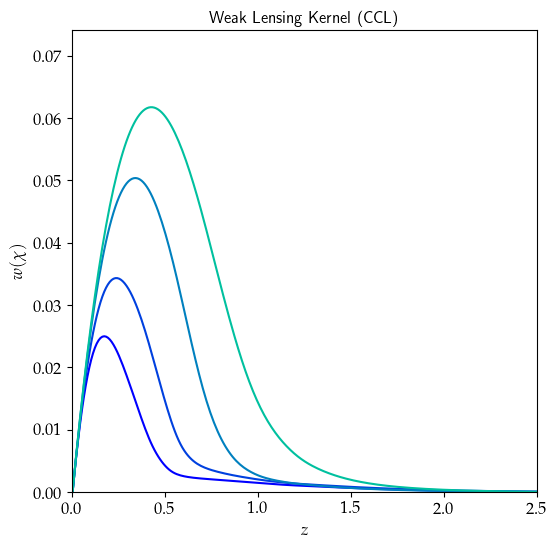

In [20]:
plt.figure(figsize=(6,6))
plt.title('Weak Lensing Kernel (CCL)', fontsize = fontSize)
for i in range(ndist):
    plt.plot(redshifts, ccl_wl_kernels[i], color = colors[i])
plt.ylabel(r'$w(\chi)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.ylim(0.0, 1.2*max([max(ccl_wl_kernels[i]) for i in range(ndist)]))
plt.xlim(0.0, 2.5)
plt.show()

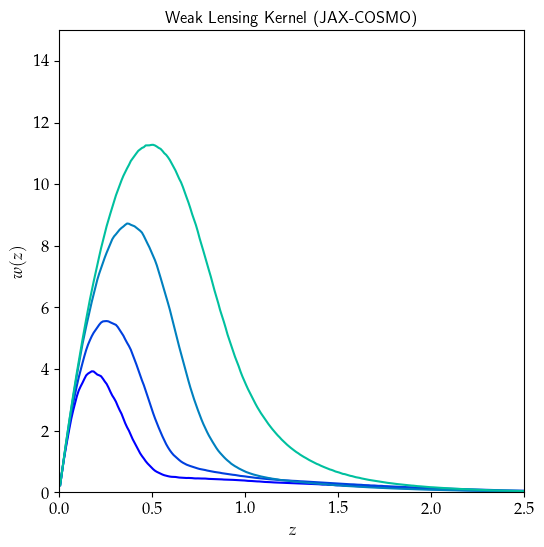

In [21]:
plt.figure(figsize=(6,6))
plt.title('Weak Lensing Kernel (JAX-COSMO)', fontsize = fontSize)
for i in range(ndist):
    plt.plot(redshifts, jc_wl_kernels[:,i,i], color = colors[i])
plt.ylabel(r'$w(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.ylim(0.0, 15)
plt.xlim(0.0, 2.5)
plt.show()